In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [75]:
location_countries = pd.read_csv("Data/countries.csv")
location_countries = location_countries.rename(columns = {"country": "country_code"})
location_countries.head(5)

,country_code,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [76]:
user_location_df = pd.read_csv("Data/clean-locations.csv")
user_location_df = user_location_df.drop_duplicates(subset=['user_id'], keep='first')
user_location_df = user_location_df[["user_id", "country_code"]]
user_location_df["country_code"] = user_location_df["country_code"].str.upper()
user_location_df = user_location_df.sort_values(by = ["user_id"])
user_location_df

,user_id,country_code
73685,1,US
1318,3,NO
37973,4,AU
49320,20,NO
6025,36,NaN
...,...,...
39132,7248525,BR
105540,7248850,NL
51441,7249032,BD
100710,7250030,FI


In [77]:
#Calculate the number of user watching anime for each country
num_users_per_country = user_location_df.groupby(['country_code']).agg({
    'user_id': 'count'  # Count of anime_id
})

# Rename columns as per the SQL query
num_users_per_country.columns = ['num_users']

# Reset index to make anime_id a column again
num_users_per_country.reset_index(inplace=True)
num_users_per_country = num_users_per_country.sort_values(by= ["num_users"], ascending=False)

In [78]:
num_users_per_country = pd.merge(num_users_per_country, location_countries, on='country_code', how='inner')
num_users_per_country

,country_code,num_users,latitude,longitude,name
0,US,25480,37.090240,-95.712891,United States
1,BR,6678,-14.235004,-51.925280,Brazil
2,PL,6372,51.919438,19.145136,Poland
3,GB,5769,55.378051,-3.435973,United Kingdom
4,CA,5063,56.130366,-106.346771,Canada
...,...,...,...,...,...
190,KI,1,-3.370417,-168.734039,Kiribati
191,MS,1,16.742498,-62.187366,Montserrat
192,ET,1,9.145000,40.489673,Ethiopia
193,GW,1,11.803749,-15.180413,Guinea-Bissau


50


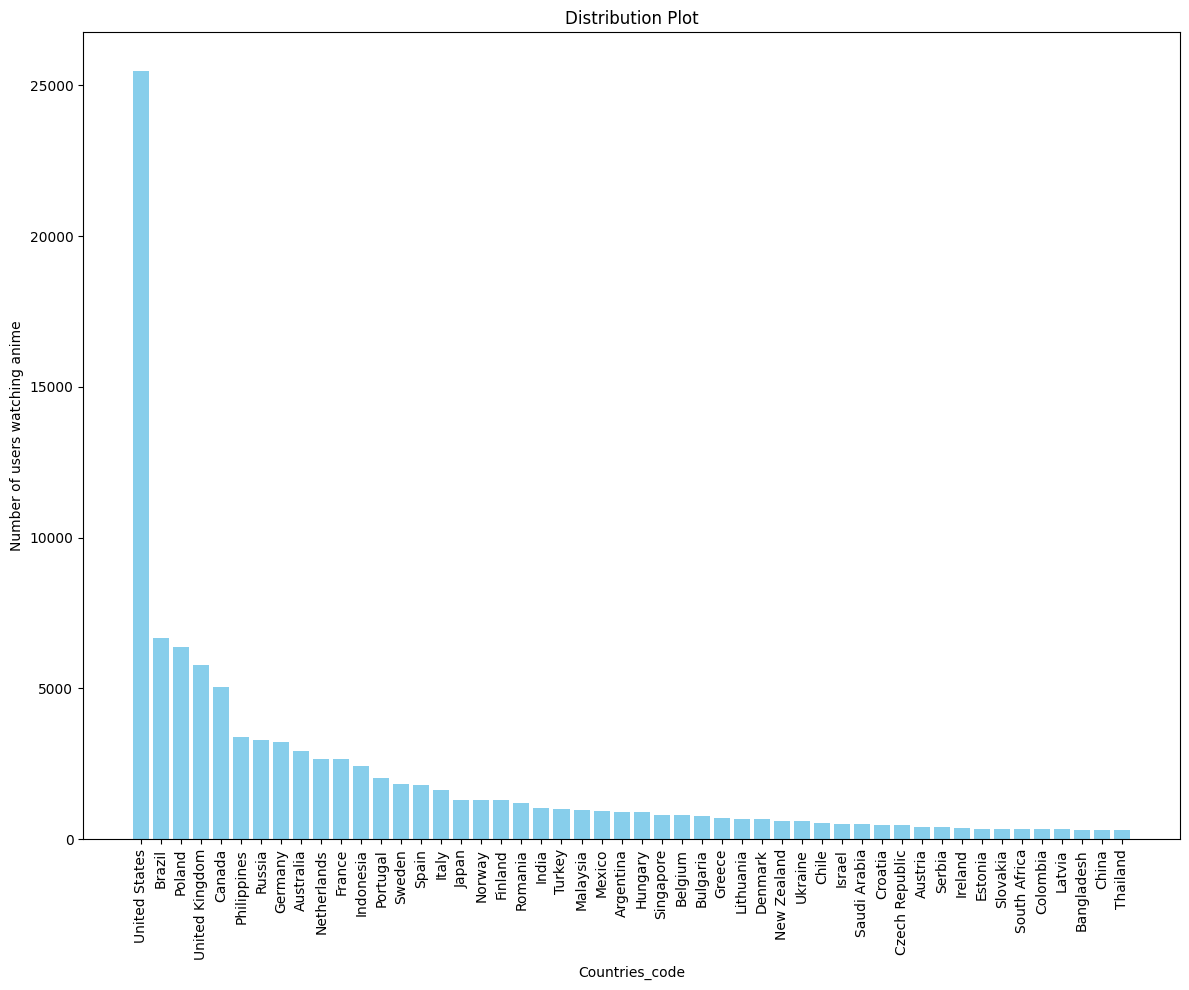

In [79]:
#Only plot top 30 countries
num_users_per_country_shortened = num_users_per_country[:50]


keys = list(num_users_per_country_shortened["name"])
values = list(num_users_per_country_shortened["num_users"])
print(len(values))


plt.figure(figsize=(12, 10))
plt.bar(keys, values, color='skyblue')
plt.xlabel('Countries_code')
plt.ylabel('Number of users watching anime')
plt.title('Distribution Plot')
plt.xticks(rotation='vertical')  
plt.tight_layout()
plt.savefig("Figures/User_Distribution.png", dpi = 200)
plt.show()

In [80]:
num_users_per_country

,country_code,num_users,latitude,longitude,name
0,US,25480,37.090240,-95.712891,United States
1,BR,6678,-14.235004,-51.925280,Brazil
2,PL,6372,51.919438,19.145136,Poland
3,GB,5769,55.378051,-3.435973,United Kingdom
4,CA,5063,56.130366,-106.346771,Canada
...,...,...,...,...,...
190,KI,1,-3.370417,-168.734039,Kiribati
191,MS,1,16.742498,-62.187366,Montserrat
192,ET,1,9.145000,40.489673,Ethiopia
193,GW,1,11.803749,-15.180413,Guinea-Bissau


In [81]:
fig = px.choropleth(num_users_per_country, 
                    locations='name',
                    locationmode='country names',
                    color='num_users',
                    hover_name='name',
                    projection='natural earth',
                    color_continuous_scale='Reds')

fig.update_geos(showcoastlines=False, showland=True, landcolor='white',
                showocean=False, oceancolor='#add8e6', showlakes=False)

fig.update_layout(title_text='Number of Users by Country')

fig.write_image("Figures/Users-Geo.png", scale = 2)